In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import layers


import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random

print(tf.__version__)

2.10.0


# 1. Preparing

In [5]:
img_array = cv2.imread("test/0/PrivateTest_1221822.jpg")
print(img_array.shape) #RGB
img_array

(48, 48, 3)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [173, 173, 173],
        [122, 122, 122],
        [ 72,  72,  72]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [170, 170, 170],
        [122, 122, 122],
        [ 77,  77,  77]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [165, 165, 165],
        [119, 119, 119],
        [ 81,  81,  81]],

       ...,

       [[189, 189, 189],
        [195, 195, 195],
        [203, 203, 203],
        ...,
        [143, 143, 143],
        [144, 144, 144],
        [154, 154, 154]],

       [[167, 167, 167],
        [173, 173, 173],
        [181, 181, 181],
        ...,
        [157, 157, 157],
        [155, 155, 155],
        [158, 158, 158]],

       [[131, 131, 131],
        [138, 138, 138],
        [149, 149, 149],
        ...,
        [160, 160, 160],
        [163, 163, 163],
        [159, 159, 159]]

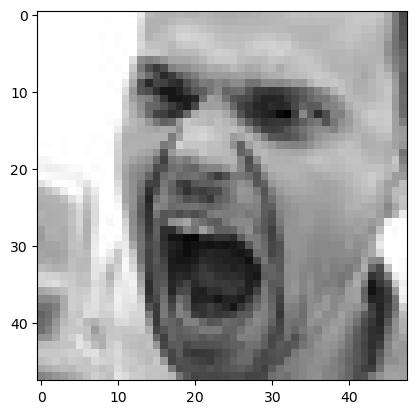

In [6]:
plt.imshow(img_array) #BRG

## Resize img

In [7]:
Datadirectory = "test/"  #training datadset

#Classes = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
Classes = ["0", "1", "2", "3", "4", "5", "6"]

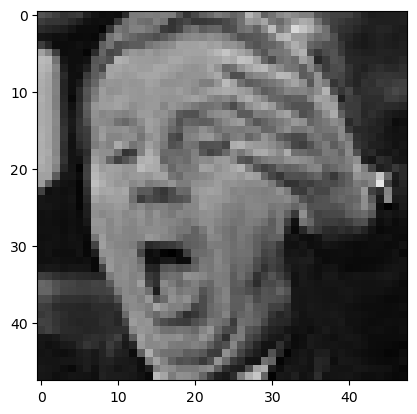

In [8]:
for category in Classes:
    path = os.path.join(Datadirectory, category) 
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        #backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor (img_array, cv2.COLOR_BGR2RGB)) 
        plt.show()
        break
    break

(224, 224, 3)


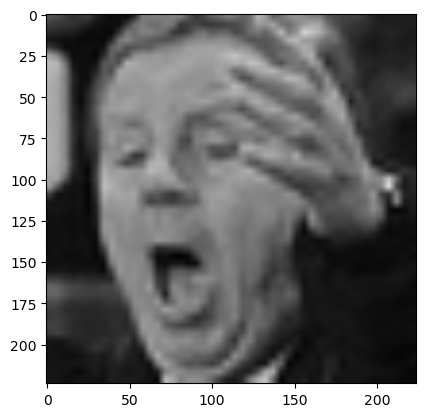

In [9]:
img_size  = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show
print(new_array.shape)

In [10]:
# resize all img
training_Data = []

def create_training_Dataa():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                #raise ValueError
                pass

In [11]:
create_training_Dataa()

In [12]:
print(len(training_Data))

7178


In [14]:
# temp = np.array(training_Data)
# temp.shape

In [15]:
random.shuffle(training_Data)

In [16]:
X = [] # features
Y = [] # label

for features, label in training_Data:
    X.append(features)
    Y.append(label)


# converting to 4 dimention
X = np.array(X).reshape(-1, img_size, img_size, 3)
print(X.shape)

(7178, 224, 224, 3)


In [17]:
#normalize data
X = X/255.0;

In [18]:
type(Y)

list

In [19]:
Y = np.array(Y)

In [20]:
Y.shape

(7178,)

# 2.Training model

In [21]:
# # import tensorflow as tf
# # print(tf.__version__)
# # tf.compat.v1.disable_eager_execution()
# # print(tf.config.list_physical_devices())
# from tensorflow.python.client import device_lib
# #from tensorflow.python.compiler.mlcompute import mlcompute

# print([x.name for x in device_lib.list_local_devices() if x.device_type == 'GPU'])
# #print("is_apple_mlc_enabled %s" % mlcompute.is_apple_mlc_enabled())
# #print("is_tf_compiled_with_apple_mlc %s" % tf.python.compiler.mlcompute.is_tf_compiled_with_apple_mlc())
# # from tensorflow.keras import datasets, layers, models

In [22]:
#pretrained
model = tf.keras.applications.MobileNetV2()

2023-03-31 14:27:43.571452: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [24]:
base_input = model.layers[0].input

In [25]:
base_output = model.layers[-2].output

In [26]:
print(base_input)
print(base_output)

KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1280), dtype=tf.float32, name=None), name='global_average_pooling2d/Mean:0', description="created by layer 'global_average_pooling2d'")


In [28]:
final_output = layers.Dense(128)(base_output)   ## adding new layer, after the output of global pooling layer
final_output = layers.Activation('relu')(final_output)      ## activation function
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output)    ## my classes are 07

In [29]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_4')>

In [30]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [33]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [34]:
new_model.compile(loss = "sparse_categorical_crossentrophy", optimizer="adam", metrics=["acuracy"])

In [37]:
new_model.fit(X,Y, epochs=5)

Epoch 1/5


ValueError: in user code:

    File "/Users/roma/anaconda3/envs/deep_learning/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/Users/roma/anaconda3/envs/deep_learning/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/roma/anaconda3/envs/deep_learning/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/Users/roma/anaconda3/envs/deep_learning/lib/python3.10/site-packages/keras/engine/training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/roma/anaconda3/envs/deep_learning/lib/python3.10/site-packages/keras/engine/training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "/Users/roma/anaconda3/envs/deep_learning/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 240, in __call__
        self.build(y_pred)
    File "/Users/roma/anaconda3/envs/deep_learning/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 182, in build
        self._losses = tf.nest.map_structure(
    File "/Users/roma/anaconda3/envs/deep_learning/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 353, in _get_loss_object
        loss = losses_mod.get(loss)
    File "/Users/roma/anaconda3/envs/deep_learning/lib/python3.10/site-packages/keras/losses.py", line 2649, in get
        return deserialize(identifier)
    File "/Users/roma/anaconda3/envs/deep_learning/lib/python3.10/site-packages/keras/losses.py", line 2603, in deserialize
        return deserialize_keras_object(
    File "/Users/roma/anaconda3/envs/deep_learning/lib/python3.10/site-packages/keras/utils/generic_utils.py", line 769, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: sparse_categorical_crossentrophy. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


In [ ]:
new_model.save("Model2_TL_epoch5.h5")